# Project: The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I will analyze the TMDb dataset to answer the following questions:

>* What are the top 10 movies with the highest budget, revenue, and profit?
>* Is there a relationship between the movie's budget and revenue?
>* Is there a relationship between the movie's budget and profit?

#### Setting up my notebook.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this step I will load in the data, check for cleanliness, and then trim and clean TMDb dataset for analysis.

### General Properties

In this step I will loading the dataset.

In [66]:
df = pd.read_csv('tmdb-movies.csv')

 In this step I will print out a few lines to inspect what the dataset contains.

In [67]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I will check to see how many rows and columns are contained in the dataset.

In [68]:
df.shape

(10866, 21)

There are 10866 rows and 21 columns.

In this step I will get a summary of the dataset.

In this step I will get column information.

In [69]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning

I will be removing some of the columns that I will not be using in my analysis.

In [71]:
df_drop_col = df.drop(columns=['id', 'imdb_id','homepage', 'tagline', 'production_companies', 'keywords', 'overview', 'cast', 'director', 'genres'])

I am left with the following columns.

In [72]:
df_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   runtime         10866 non-null  int64  
 5   release_date    10866 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


I will now drop any duplicate rows

In [73]:
df = df_drop_col.drop_duplicates()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   release_date    10865 non-null  object 
 6   vote_count      10865 non-null  int64  
 7   vote_average    10865 non-null  float64
 8   release_year    10865 non-null  int64  
 9   budget_adj      10865 non-null  float64
 10  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1018.6+ KB


There are no null values to be filled.

<a id='eda'></a>
## Exploratory Data Analysis

### What are the Top 10 highest revenue, budget and profit movies?
>#### The top 10 movies with the highest budget, revenue, and profit are important this analysis because they provide insight into which movies have been the most financially successful. Identifying the top movies in can help in making informed decisions about future movie production and investment.

#### Top 10 Highest Revenue Movies

Sort the dataset by revenue and select the top 10 movies

In [75]:
df_sorted = df.sort_values('revenue', ascending=False).head(10)

Create a bar plot of the top 10 highest revenue movies.

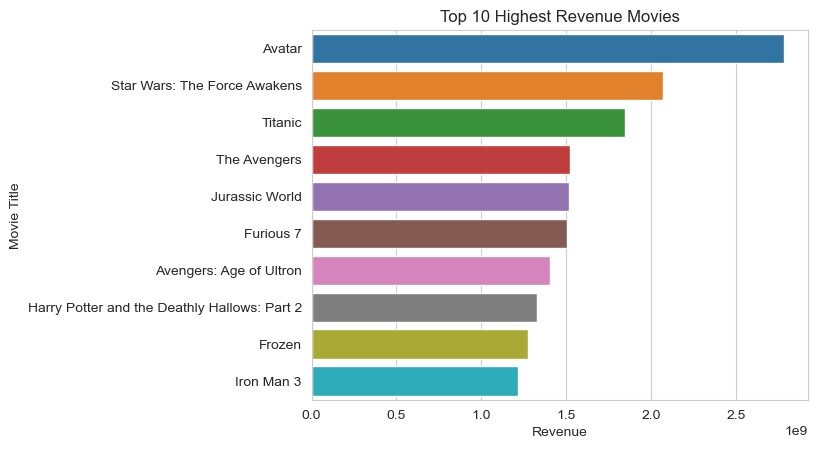

In [76]:
sns.set_style('whitegrid')
sns.barplot(x='revenue', y='original_title', data=df_sorted)
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Revenue Movies')
plt.show()


<center><i>This bar plot shows the top 10 highest revenue movies.</i><center>

Histogram Function

In [77]:
def create_histogram(dataframe, column, xlabel, ylabel, title):
    sns.set_style('whitegrid')
    sns.histplot(dataframe[column], kde=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

Calling the function create_histogram for the column revenue.

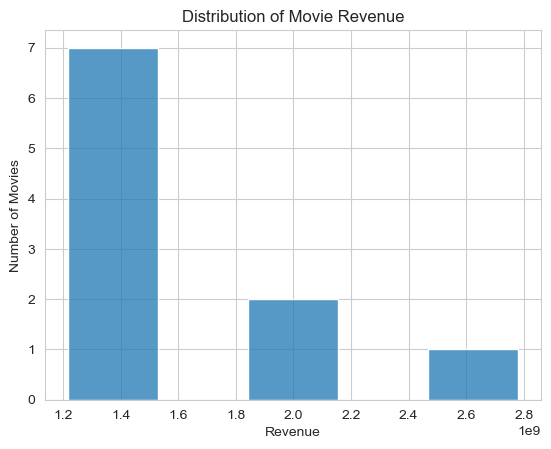

In [78]:
create_histogram(df_sorted, column='revenue', xlabel='Revenue', ylabel='Number of Movies', title='Distribution of Movie Revenue')

<center><i>This histogram shows the distribution of revenue for the top 10 highest revenue movies.</i><center>
<center><i>Of the Top 10 highest revenue movies 7 are in the same range and 1 is clearly higher than the others.</i><center>

#### Top 10 Highest Budget Movies

Sort the dataset by budget and select the top 10 movies

In [79]:
df_sorted = df.sort_values('budget', ascending=False).head(10)

Create a bar plot of the top 10 highest budget movies.

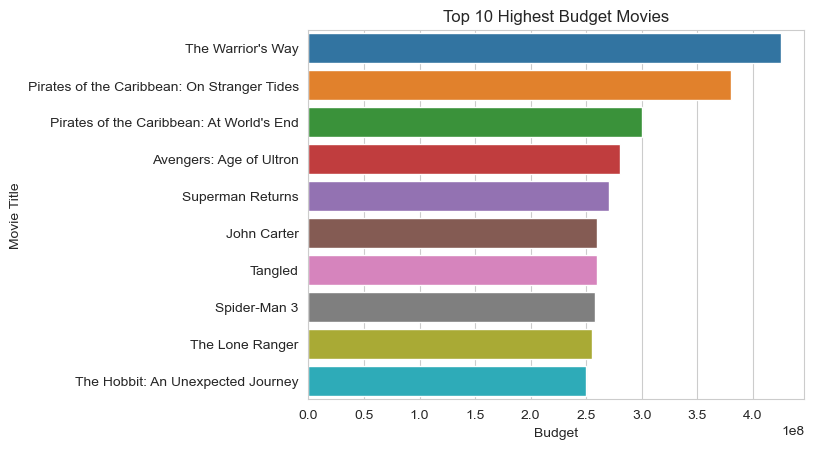

In [80]:
sns.set_style('whitegrid')
sns.barplot(x='budget', y='original_title', data=df_sorted)
plt.xlabel('Budget')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Budget Movies')
plt.show()

<center><i>This bar plot shows the top 10 highest budget movies.</i><center>

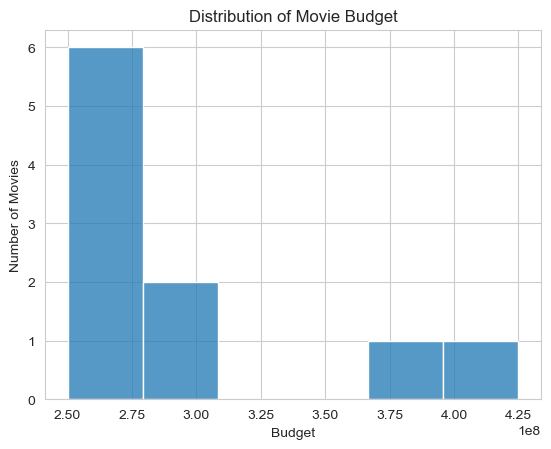

In [81]:
create_histogram(df_sorted, column='budget', xlabel='Budget', ylabel='Number of Movies', title='Distribution of Movie Budget')

<center><i>This histogram shows the distribution of revenue for the top 10 highest budget movies.</i><center>
<center><i>Of the Top 10 highest budget movies 6 are in the same range and 2 are clearly higher than the others.</i><center>

#### Top 10 Highest Profit Movies

Calculate the profit as the difference between revenue and budget

In [82]:
df_profit = df.copy()
df_profit['profit'] = df['revenue'] - df['budget']

Sort the dataset by profit and select the top 10 movies

In [83]:
df_sorted_profit = df_profit.sort_values('profit', ascending=False).head(10)

Create a bar plot of the top 10 movies by profit

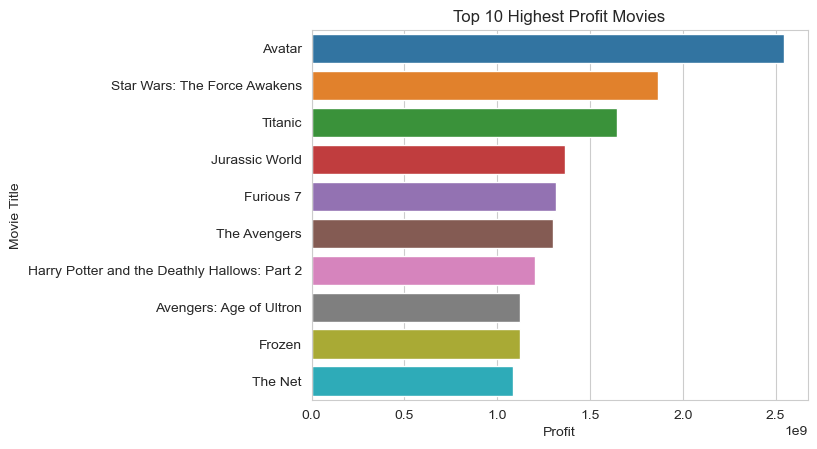

In [84]:
sns.set_style('whitegrid')
sns.barplot(x='profit', y='original_title', data=df_sorted_profit)
plt.xlabel('Profit')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Profit Movies')
plt.show()

<center><i>This bar plot shows the top 10 highest profit movies.</i><center>

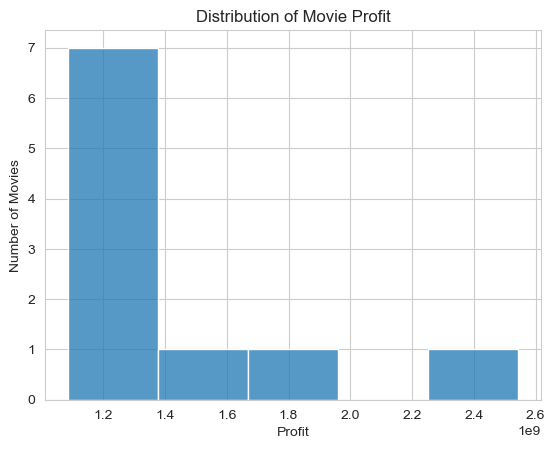

In [85]:
create_histogram(df_sorted_profit, column='profit', xlabel='Profit', ylabel='Number of Movies', title='Distribution of Movie Profit')

<center><i>This histogram shows the distribution of profit for the top 10 highest profit movies.</i><center>
<center><i>Of the Top 10 highest profit movies 7 are in the same range and 1 is clearly higher than the others.</i><center>  

### Is there a relationship between the movie's budget and revenue?
>#### The relationship between a movie's budget and revenue are important for understanding the financial success of movies. By analyzing these relationships, it is possible to determine if higher budgets generally lead to higher revenue.

#### Relationship Between Budget and Revenue

Scatter Plot Function
> The scatter plot can be used to visualize the relationship between these two features and to identify any patterns or trends in the data.

In [86]:
def create_scatterplot(x_col, y_col, dataframe, xlabel, ylabel, title):
    sns.scatterplot(x=x_col, y=y_col, data=dataframe)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

Calling the function create_scatterplot.
> This will show the relationship between movie budget and revenue.

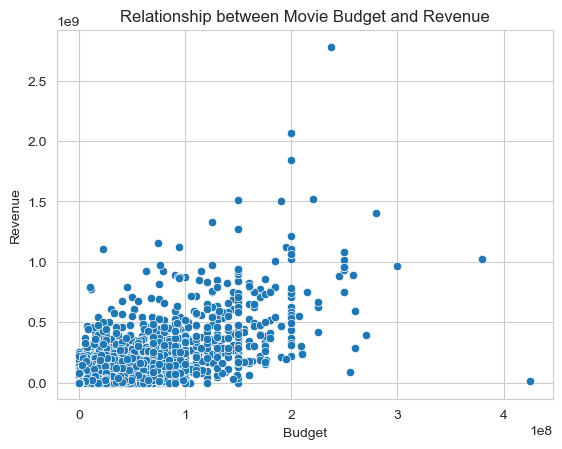

In [87]:
create_scatterplot(x_col="budget", y_col="revenue", dataframe=df, xlabel="Budget", ylabel="Revenue", title="Relationship between Movie Budget and Revenue")

<center><i>Each point on the scatter plot represents a single movie in the dataset. Its position on the plot determined by its budget and revenue values. Here we do see some linear patterns which suggest that a higher budget will lead to a higher revenue.</i><center>

The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. A positive indicates correlation while negative indicates no correlation.

Find and print the correlation coefficient between budget and revenue.

In [88]:
corr_coef = df['budget'].corr(df['revenue'])
print('The correlation coefficient between budget and revenue is: ', corr_coef)

The correlation coefficient between budget and revenue is:  0.7349279812889288


>A strong positive correlation coefficient of 0.7349 was found between budget and revenue. This suggests that movies with higher budgets tend to generate higher revenues.

### Is there a relationship between the movie's budget and profit?
>#### The relationship between a movie's budget and profit, are also important for understanding the financial success of movies. By analyzing these relationships, it is possible to determine if higher budgets generally lead to higher profit.

#### Relationship Between Budget and Profit

Calling the function create_scatterplot.

>This will show the relationship between movie budget and profit.

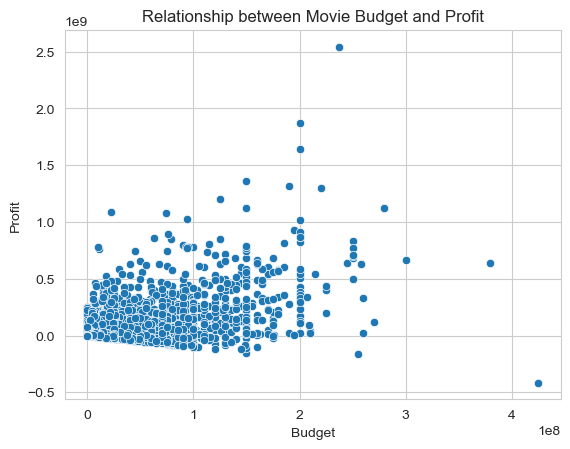

In [89]:
create_scatterplot(x_col="budget", y_col="profit", dataframe=df_profit, xlabel="Budget", ylabel="Profit", title="Relationship between Movie Budget and Profit")

<center><i>Each point on the scatter plot represents a single movie in the dataset. Its position on the plot determined by its budget and profit values. Here we do see some linear patterns which suggest that a higher budget will lead to a higher profit.</i><center>

Find and print the correlation coefficient between budget and profit.

In [90]:
corr_coef = df_profit['budget'].corr(df_profit['profit'])
print('The correlation coefficient between budget and profit is: ', corr_coef)

The correlation coefficient between budget and profit is:  0.5702224385386814


>A moderate positive corelation coefficient of 0.5702 was also found between budget and profit. This means that as the budget increases, there is a tendency for the profit to increase as well.

#### Understanding the relationships between budget, revenue, and profit can help movie production companies and investors make informed decisions about how to allocate resources and invest in future projects. It can also help identify areas where improvements can be made to increase profitability.

<a id='conclusions'></a>
## Conclusions

>#### After analyzing the Top 10 movies with the highest budget, revenue, and profit, I found that many of them overlap.

>##### The following movies appear in both the Top 10 for revenue and profit:
>>* Avatar
>>* Star Wars: The Force Awakens
>>* Titanic
>>* Jurassic World
>>* Furious 7
>>* Avengers: Age of Ultron
>>* Harry Potter and the Deathly Hallows: Part 2
>>* Frozen
>##### Included in all 3 catagories is:
>>* Avengers: Age of Ultron
>##### It is important to note that the dataset does have its limitations:

>* The dataset is not a representative of the every movie. The number of samples in the dataset are not sufficient to draw conclusions about the every movie ever made. 

>* Some movies in the dataset had zero list for budget and/or revenue.

>* There are variables that could influence the relationship between the budget, revenue, and profit that were not in this analysis such as cast and release year.

>While the analysis is limited by the dataset size and lack of control for confounding variables, the results suggest that a movie's budget does impact its revenue and profit potential. Multiple movies ranked among the top 10 for budget, revenue and profit, indicating an overlap between these successful films. A moderate positive correlation was also found between budget and profit. More comprehensive datasets and additional variables could help better establish the impact of a movies budget's impact. Still, this analysis provides evidence that budget size matters for movies and their financial performance.

<a id='ref'></a>
## References

>Adam-P. (n.d.). Markdown Cheatsheet. GitHub. https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

>seaborn: statistical data visualization — seaborn 0.12.2 documentation. (n.d.). https://seaborn.pydata.org/

>Udacity. (2017, November 30). Investigate A Dataset Project Walkthrough Final [Video]. YouTube. https://www.youtube.com/watch?v=OtDZCYxbHB4